In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, MaxPooling2D, Activation, BatchNormalization, Dropout, Dense, Flatten
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
from PIL import Image

2024-05-01 19:43:20.857074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 19:43:20.857236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 19:43:21.013465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Data Path
ai_path = "/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData"
real_path = "/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt"

In [4]:
# Function to load and resize images from a directory
def load_images_from_dir(path, label, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(path, filename))
            img = img.resize(target_size)  # Resize image to target size
            img = Image.fromarray(np.array(img)).convert('RGB')
            
            images.append(np.array(img))
            labels.append(label)
    return images, labels

In [5]:
# Load images from AI-generated directory
ai_images, ai_labels = load_images_from_dir(ai_path, 0)

# Load images from RealArt directory
real_images, real_labels = load_images_from_dir(real_path, 1)

# Concatenate the AI-generated and real images and labels
x = np.concatenate((ai_images, real_images), axis=0)
y = np.array(ai_labels + real_labels)

In [6]:
type(x)

numpy.ndarray

In [7]:
x = x/255.0

In [8]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [11]:
y_test.shape

(137,)

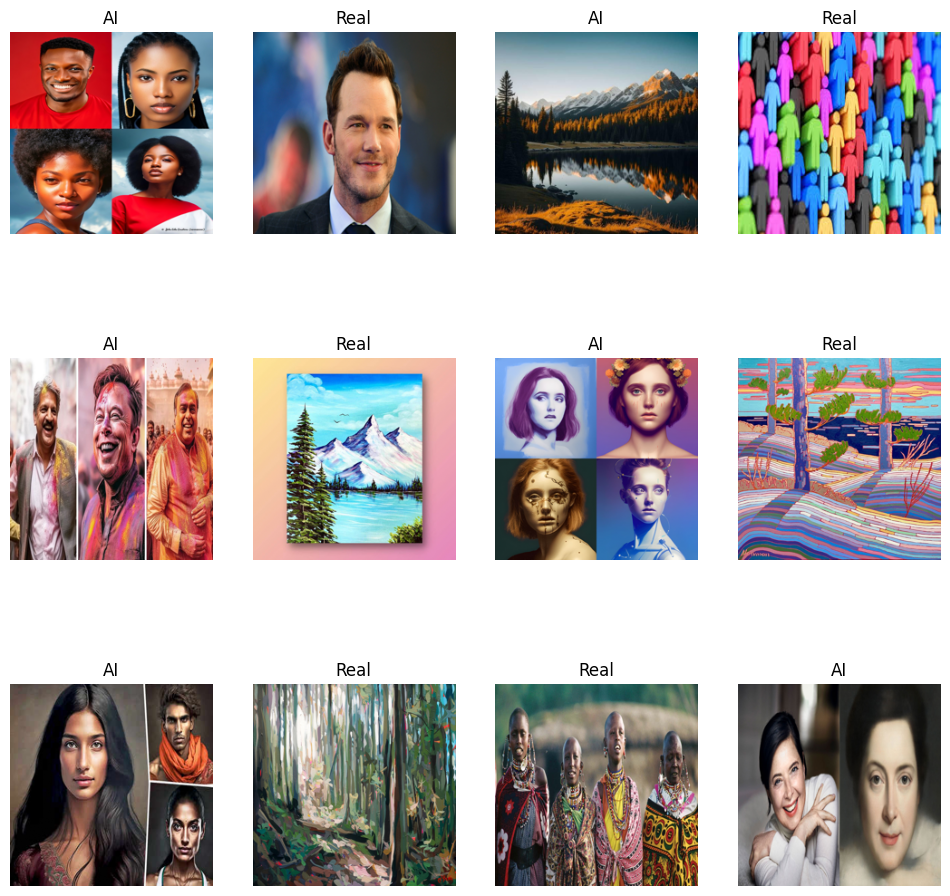

In [12]:
plt.figure(figsize=(12, 12))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train_full[i])
    plt.title("AI" if y_train_full[i] == 0 else "Real")
    plt.axis('off')
plt.show()

In [13]:
y_train_full[0:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [14]:
y_test[0:10]

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [77]:
model = Sequential()

# 1st CNN
model.add(Conv2D(filters=96, kernel_size = (11, 11), strides= (11,11), padding = 'valid', input_shape = (224,224,3)))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
# Batch Normalization before passing it to the next layer
model.add(BatchNormalization())

# 2nd CNN
model.add(Conv2D(filters = 256, kernel_size=(5,5), strides= (1,1), padding='same'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
# Batch Normalization before passing it to the next layer
model.add(BatchNormalization())

# 3rd CNN
model.add(Conv2D(filters = 384, kernel_size=(3, 3), strides= (1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalization before passing it to the next layer
model.add(BatchNormalization())

# 4th CNN
model.add(Conv2D(filters = 384, kernel_size=(3, 3), strides= (1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalization before passing it to the next layer
model.add(BatchNormalization())

# 5th CNN
model.add(Conv2D(filters = 256, kernel_size=(3, 3), strides= (1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
# Batch Normalization before passing it to the next layer
model.add(BatchNormalization())


model.add(Flatten())


model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_222 (Conv2D)             │ (None, 20, 20, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_360 (Activation)     │ (None, 20, 20, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_248         │ (None, 9, 9, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_223 (Conv2D)             │ (None, 9, 9, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_361 (Activation)     │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_249         │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_224 (Conv2D)             │ (None, 4, 4, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_362 (Activation)     │ (None, 4, 4, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_250         │ (None, 4, 4, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_225 (Conv2D)             │ (None, 4, 4, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_363 (Activation)     │ (None, 4, 4, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_251         │ (None, 4, 4, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_226 (Conv2D)             │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_364 (Activation)     │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_252         │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_365 (Activation)     │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 21,882,050 (83.47 MB)

 Trainable params: 21,862,786 (83.40 MB)

 Non-trainable params: 19,264 (75.25 KB)

In [16]:
x_test.shape

(137, 224, 224, 3)

In [17]:
type(x_train_full)

numpy.ndarray

In [18]:
x_valid, x_train = x_train_full[:100], x_train_full[100:]
y_valid, y_train = y_train_full[:100], y_train_full[100:]

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
y_valid = keras.utils.to_categorical(y_valid, 2)

In [44]:
y_test[0:20]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [45]:
y_valid[0:20]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [21]:
x_train.shape

(676, 224, 224, 3)

In [22]:
y_train.shape

(676, 2)

In [47]:
x_valid[0]

array([[[0.67843137, 0.05490196, 0.10196078],
        [0.67843137, 0.05490196, 0.10196078],
        [0.68235294, 0.05882353, 0.10196078],
        ...,
        [0.43529412, 0.61568627, 0.71764706],
        [0.43137255, 0.61176471, 0.71372549],
        [0.43137255, 0.61176471, 0.71372549]],

       [[0.68235294, 0.05490196, 0.10196078],
        [0.68235294, 0.05490196, 0.10196078],
        [0.68627451, 0.05882353, 0.10196078],
        ...,
        [0.43529412, 0.61568627, 0.71764706],
        [0.43529412, 0.61568627, 0.71764706],
        [0.43529412, 0.61568627, 0.71764706]],

       [[0.69019608, 0.05490196, 0.10588235],
        [0.69019608, 0.05490196, 0.10588235],
        [0.69019608, 0.05490196, 0.10196078],
        ...,
        [0.43529412, 0.61568627, 0.71764706],
        [0.43529412, 0.61568627, 0.71764706],
        [0.43529412, 0.61568627, 0.71764706]],

       ...,

       [[0.4       , 0.6627451 , 0.76470588],
        [0.40784314, 0.6627451 , 0.76470588],
        [0.41960784, 0

In [68]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True)

In [57]:
import pandas as pd

In [78]:
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])
hist = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_valid, y_valid), shuffle=True, callbacks=[early_stopping_cb])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5568 - loss: 0.9125 - val_accuracy: 0.5600 - val_loss: 0.6921
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6120 - loss: 0.8048 - val_accuracy: 0.5600 - val_loss: 0.6883
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6795 - loss: 0.6899 - val_accuracy: 0.5600 - val_loss: 0.6861
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7511 - loss: 0.5244 - val_accuracy: 0.5600 - val_loss: 0.6861
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8258 - loss: 0.4018 - val_accuracy: 0.5600 - val_loss: 0.6854
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8396 - loss: 0.3725 - val_accuracy: 0.5600 - val_loss: 0.6863
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8954 - loss: 0.2688 - val_accuracy: 0.5600 - val_loss: 0.6900
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9366 - loss: 0.1774 - val_accuracy: 0.5600 - val_loss: 0.6969


<Axes: >

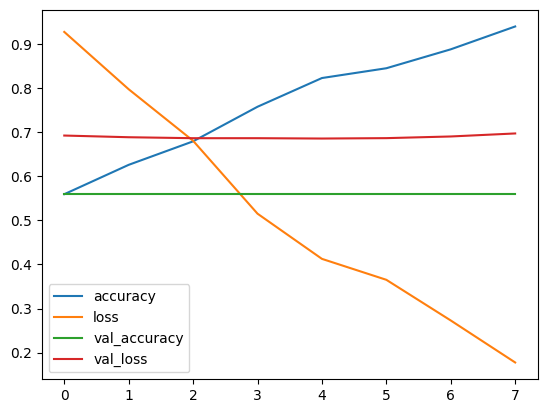

In [80]:
pd.DataFrame(hist.history).plot()

In [81]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5680 - loss: 0.6830


[0.6843962669372559, 0.5620437860488892]